Gans work via the principle of **Maximum likelihood**


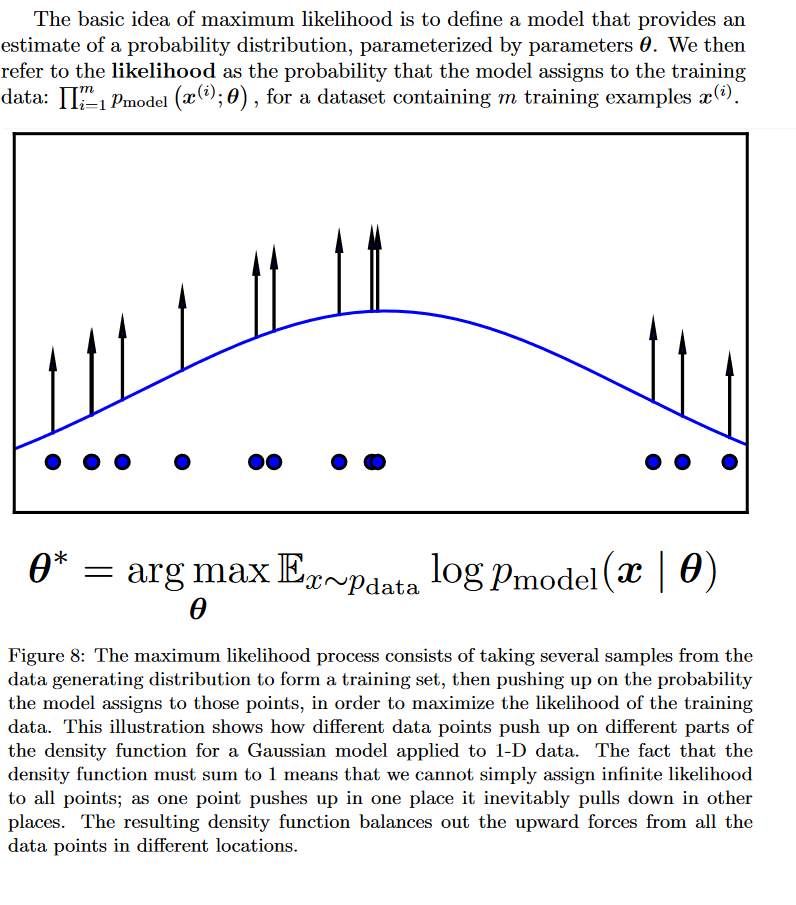

Note, the following Tree shows the different type of generative models there are.

 Deep generative models that can learn via the principle of maximim likeli-hood differ with respect to how they represent or approximate the likelihood.  On theleft branch of this taxonomic tree, models construct an explicit density,pmodel(x;θ),and thus an explicit likelihood which can be maximized.  Among these explicit den-sity models, the density may be computationally tractable, or it may be intractable,meaning  that  to  maximize  the  likelihood  it  is  necessary  to  make  either  variatioanlapproximations or Monte Carlo approximations (or both).  On the right branch of thetree, the model does not explicitly represent a probability distribution over the spacewhere the data lies.  Instead, the model provides some way of interacting less directlywith this probability distribution.  Typically the indirect means of interacting with theprobability distribution is the ability to draw samples from it.  Some of these implicitmodels  that  offer  the  ability  to  sample  from  the  distribution  do  so  using  a  MarkovChain; the model defines a way to stochastically transform an existing sample in orderto obtain another sample from the same distribution.  Others are able to generate asample in a single step, starting without any input.  While the models used for GANscan sometimes be constructed to define an explicit density, the training algorithm forGANs  makes  use  only  of  the  model’s  ability  to  generate  samples.   GANs  are  thustrained using the strategy from the rightmost leaf of the tree:  using an implicit modelthat samples directly from the distribution represented by the model.

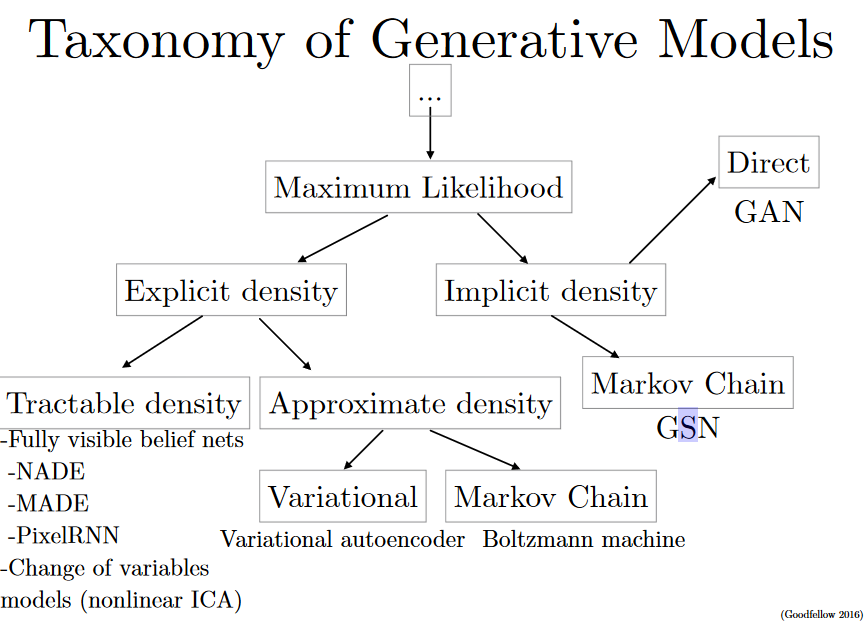

## The training process
The training process The training process consists of simultaneous SGD.

1. On each step, two minibatches are sampled: a minibatch of x values from the
dataset and a minibatch of z values drawn from the model’s prior over latent
variables. 
2. Then two gradient steps are made simultaneously: one updating θ(D)
to reduce J(D) and one updating θ(G) to reduce J(G)

**NOTE; Any gradient-based optimization algorithm is good, but they recommend Adam.**

**NOTE; Many authors recommend running more steps of one player than the other, but as of late 2016, the author’s opinion is that the protocol that works the best in practice is simultaneous gradient descent, with one step for each player.**

## Cost functions
"Several different cost functions may be used within the GANs framework."

### Discriminator Cost
"All of the different games designed for GANs so far use the same cost, cross-entropy"


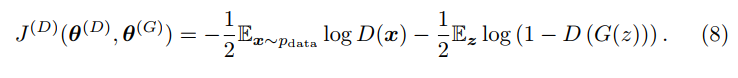

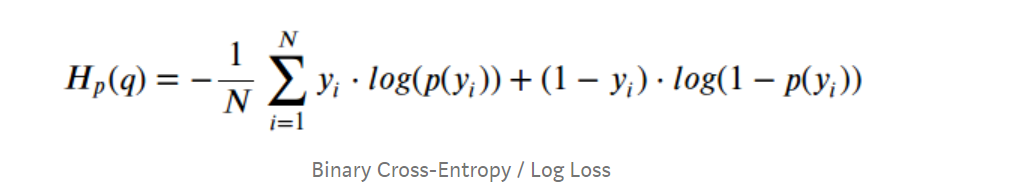

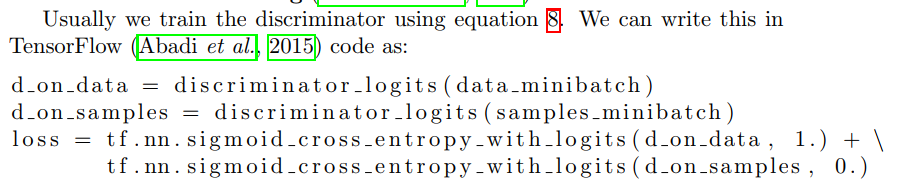

NOTE: The `\` just means line change

Which is better explained as:

n = 2 (average)

* `Loss = -1/n * SUM (   real_label * log(Discriminator(real_images)) + (1-real_label) * log(1- Discriminator(generated_images))    )`  <- This might be wrong. I interpreter the *E* As labels, but I think it's just the sum 

**NOTE; This function returns A SINGLE VALUE.**



"This is just the standard cross-entropy cost that is minimized when training a standard binary classifier with a **sigmoid** output. "
NOTE: You have to use sigmoid output for the discriminator with Cross-entropy

### Exercise 
The paper has exercises, (page 21 recomends doing this one) 

#### The optimal discriminator strategy
This exercise shows how to derive the optimal discriminator strategy and discusses the importance of the form of this solution.

* Imagine that the discriminator can be optimized in function space, so the value of D(x) is specified independently for every value of x.
What is the optimal strategy for D? What assumptions need to be made to
obtain this result?

I think the optimal is getting a loss for every pair in the batch. (really?)

**NOTE: We begin by assuming that both p(data) and p(model) are non-zero everywhere.
If we do not make this assumption, then some points are never visited during
training, and have undefined behavior.**
p(data) and p(model) are the probabilities the discriminator assigns for real and generated images.


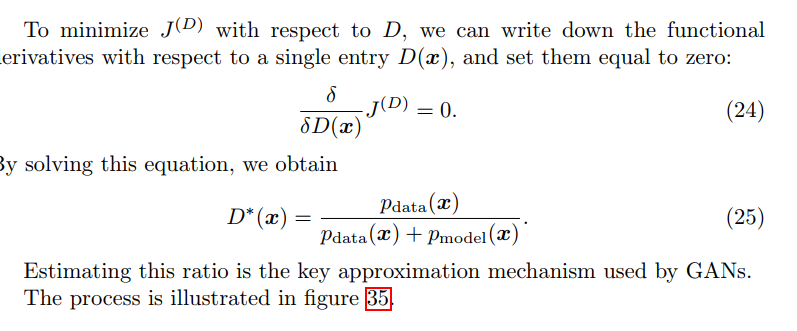

### Min-Max (Generator Cost)





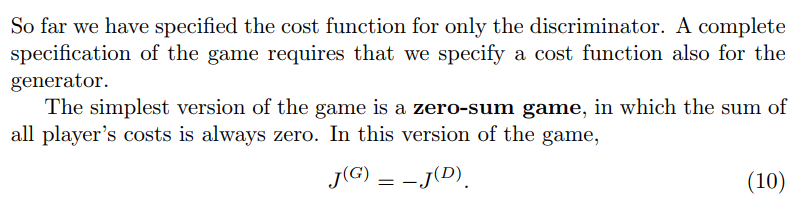

Basically the loss of the generator is the inverse of the discriminator.

**NOTE: The cost used for the generator in the minimax game (equation 10) is useful for theoretical analysis, but does not perform especially well in practice.** soo. dont use minmax.

**NOTE: In the minimax game, the discriminator minimizes a cross-entropy, but the
generator maximizes the same cross-entropy. This is unfortunate for the generator, because when the discriminator successfully rejects generator samples
with high confidence, the generator’s gradient vanishes.** 

### Heuristic, non-saturating game (Generator Cost)


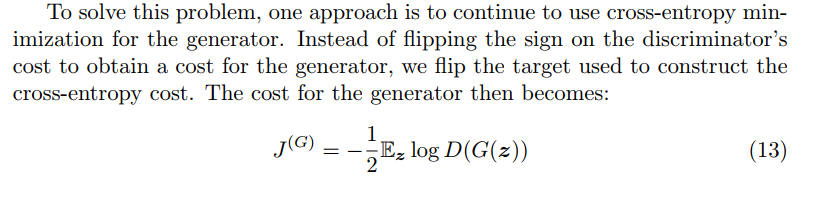

I think Ez are the labels, so we are basically doing `labels * log(D(GeneratedImages))`... I think Ez will always be 1, because the generator thinks they real... *WAIT A SECOND. IS Ez Not the sum?*


NOTE: This version of the game is heuristically motivated, rather than being motivated by a theoretical concern. The sole motivation for this version of the game
is to ensure that each player has a strong gradient when that player is "losing"
the game

### Maximum likelihood game (Another Generator Loss function)

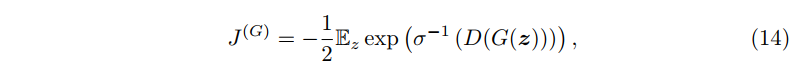

where σ is the logistic sigmoid function, is equivalent to minimizing equation 4,
under the assumption that the discriminator is optimal.  (pg. 23)

### GCost functions plotted vs discriminator likelehood

Basically you know that the discriminator outputs a probability of 0 to 1. This shows the loss each function returns at each probability (NSH returns ~5 when the disc is 0, while MinMax and MLC return ~0)

**NOTE; This includes every example, so if you take 10 images, and you are able to fool the discriminator once, the weights will be updated heavily in favour of this case. (because when you average the cost will favour this high samples. On the other hand in NSH, the function focuses more on badly performing samples)** - They end up recommending NSH Cost function

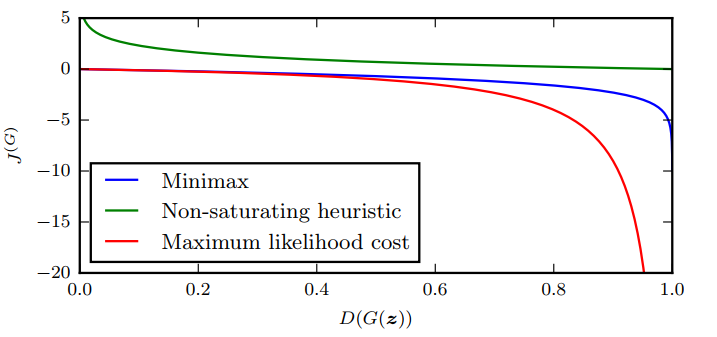

## DCGans

Some of the key insights of the
DCGAN architecture were to:

* Use batch normalization (Ioffe and Szegedy, 2015) layers in most layers
of both the discriminator and the generator, with the two minibatches for
the discriminator normalized separately. The last layer of the generator
and first layer of the discriminator are not batch normalized, so that the
model can learn the correct mean and scale of the data distribution. See
figure 17.
* The overall network structure is mostly borrowed from the all-convolutional
net (Springenberg et al., 2015). This architecture contains neither pooling
nor \unpooling" layers. When the generator needs to increase the spatial dimension of the representation it uses transposed convolution with a
stride greater than 1.
* The use of the Adam optimizer rather than SGD with momentum.


## Tricks to improve GANS
* Train with labels.
* One-sided label smoothing:
  - GANs are intended to work when the discriminator estimates a ratio of two densities, but deep neural nets are prone to producing highly confident outputs that
identify the correct class but with too extreme of a probability. This is especially the case when the input to the deep network is adversarially constructed; the classifier tends to linearly extrapolate and produce extremely confident predictions
  - To encourage the discriminator to estimate soft probabilities rather than to extrapolate to extremely confident classification, we can use a technique called one-sided label smoothing.


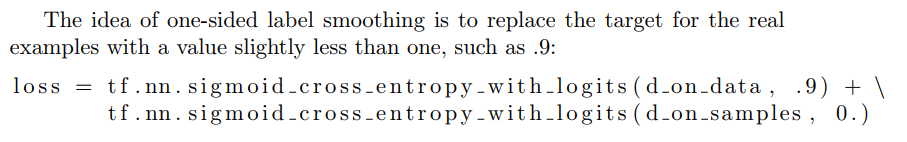

 - NOTE: It is important to not smooth the labels for the fake samples.

## Virtual batch normalization

Batch normalization is very helpful, but for GANs has a few unfortunate side
effects. The use of a different minibatch of data to compute the normalization
statistics on each step of training results in fluctuation of these normalizing
constants. When minibatch sizes are small (as is often the case when trying to
fit a large generative model into limited GPU memory) these fluctuations can
become large enough that they have more effect on the image generated by the
GAN than the input z has. See figure 21 for an example.

* Salimans et al. (2016) introduced techniques to mitigate this problem. Reference batch normalization consists of running the network twice: once on a
minibatch of reference examples that are sampled once at the start of training and never replaced, and once on the current minibatch of examples to train
on. The mean and standard deviation of each feature are computed using the
reference batch. The features for both batches are then normalized using these
computed statistics. A drawback to reference batch normalization is that the
model can overfit to the reference batch. To mitigate this problem slightly,
one can instead use virutal batch normalization, in which the normalization statistics for each example are computed using the union of that example
and the reference batch. Both reference batch normalization and virtual batch
normalization have the property that all examples in the training minibatch
are processed independently from each other, and all samples produced by the
generator (except those defining the reference batch) are i.i.d.

Soo, basically run a network with (Training = True) and another one with (Training = False), because training deactivates the batch norm (I think)

## Should D and G be balanced
Short answer, Not necessarily.
Some notes:
* The idea that the discriminator should always be optimal in order to best
estimate the ratio would suggest training the discriminator for k > 1 steps
every time the generator is trained for one step. In practice, this does not
usually result in a clear improvement.

* since the generator tends not to use its full capacity with current
training methods, practitioners presumably do not see much of a benefit from
increasing the generator capacity



## Model collapse - and solution attempts (research frontiers)
is a problem that occurs
when the generator learns to map several different input z values to the same output point.

In practice, complete mode collapse is rare, but partial mode
collapse is common. Partial mode collapse refers to scenarios in which the
generator makes multiple images that contain the same color or texture themes,
or multiple images containing different views of the same dog. 

mode collapse does not seem to be caused
by any particular cost function. 


* NOTE ON: Gan variability
In very recent work, Reed et al. (2016a) have shown that other models have higher output diversity than GANs. (So if you want to create many unique distinct images, GANs are not really for you)... (but StackGANs seem to have higher output diversity than other GAN approaches)



The mode collapse problem is probably the most important issue with GANs
that researchers should attempt to address.
One attempt is **minibatch features**(Salimans et al., 2016). The basic idea
of minibatch features is to allow the discriminator to compare an example to a
minibatch of generated samples and a minibatch of real samples. By measuring
distances to these other samples in latent spaces, the discriminator can detect
if a sample is unusually similar to other generated samples. Minibatch features
work well. It is strongly recommended to directly copy the Theano/TensorFlow
code released with the paper that introduced them, since small changes in the
definition of the features result in large reductions in performance.

Another approach to solving the mode collapse problem is **unrolled GANs**


## Discrete outputs
The only real requirement imposed on the design of the generator by the GAN
framework is that the generator must be differentiable. Unfortunately, this
means that the generator cannot produce discrete data, such as one-hot word
or character representations.

Removing this limitation is an important research
direction that could unlock the potential of GANs for NLP. 

**Soo... GANS are not really useful for NLP...**

## Conclusion

GANs are generative models that use supervised learning to approximate an
intractable cost function, much as Boltzmann machines use Markov chains to
approximate their cost and VAEs use the variational lower bound to approximate their cost. GANs can use this supervised ratio estimation technique to
approximate many cost functions, including the KL divergence used for maximum likelihood estimation.
GANs are relatively new and still require some research to reach their new
potential. In particular, training GANs requires finding Nash equilibria in highdimensional, continuous, non-convex games. Researchers should strive to develop better theoretical understanding and better training algorithms for this
scenario. Success on this front would improve many other applications, besides
GANs.
GANs are crucial to many different state of the art image generation and
manipulation systems, and have the potential to enable many other applications
in the future.

## Example of DCGAN.
* Where the depth are the filters (1024, 512, 256, 128, 3)
* The strides are 2 each step (therefore duplicating the size of the image.)
* The kernel size is the 5x5 you see at the sides (Padding = "same" so the shape is not dependant on kernel_size)


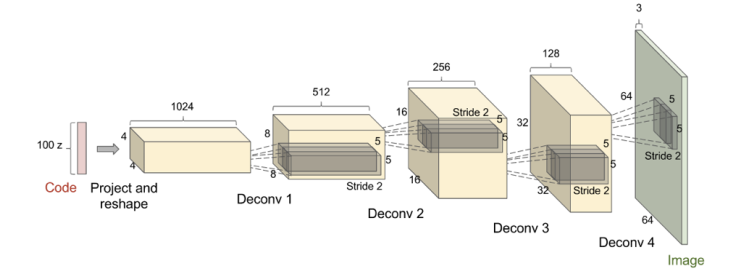

## Other notes


It seems that when you smooth, the loss becomes higher when you are overconfident. 

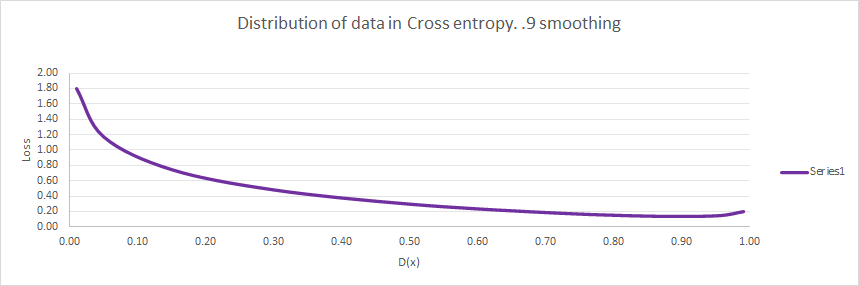